<h1>HW3</h1>

# Question 1
### (Bayes Theorem) Read the following example and complete the exercises 

Trolls Under the Bridge
1. Trolls(T) are bad
2. Gnomes(G) are benign
3. Every bridge has 5 creatures under it

Below are the probabilities of what creatures live under a bridge:
1. TTGGG: 20% (E1)
2. TGGGG: 20% (E2)
3. GGGGG: 60% (E3)

A knight is approaching a bridge and he wants to know his chance of crossing the bridge safely.

### 1.1 

#### What is the chance of the knight crossing the bridge safely?


In [103]:
60

60

### 1.2

#### Before crossing a bridge, a knight captures a troll. “I now have an 80% chance of crossing safely,” he reasons, “since only the case 20% had TTGGG (E1) now have TGGG is still a threat.”

#### Do you agree with him? Why?

I do not agree with the statement of crossing safely since the knight caught the troll from the event E1 which has two trolls. So after catching the troll from the event E1 there will be one more troll left giving probability of 20%, also another event E2 has one troll giving another 20% so 40% in total. So the probability of crossing the bridge safely is 60% and having a threat of trolls is 40%.

### 1.3

#### Now he wants to use Bayes' theorem to calculate his chance of crossing safely given a troll captured 

\begin{equation*}
P(A|B) = \frac{P(B|A)P(A)}{P(B)} \\
P(A|B): Posteior \\
P(B|A): Likelihood \\
P(A): Prior \\
P(B): Marginal Probability \\
\end{equation*}

#### Given the three events, E1, E2, and E3, which two of the three events does the knight need to consider after a troll was captured?

After capturing a troll, the events to be considered by knight should be E1(TTGGG) and E2(TGGGG);

### 1.4

#### Use Bayes' theorem to calculate the probability of the two events in 1.3 (separately) given the troll was captured. 

Probability of one event given a troll captured: E2

In [79]:
println("Prior: P(B) = Troll Captured")
println("Marginal Probability: P(A) = Event1 Occurs")
println("Posterior: P(A|B) = Event2 occurs given troll captured")
println("Likelyhood: P(B|A) = Troll captured given E1 occur = 2/5")
likelihood = (2/5)
prior = (1/5)
marginal_probability = ((2/5)*.2+((1/5)*.2)+((0/5)*0.6))
posterior = (likelihood*prior)/marginal_probability

Prior: P(B) = Troll Captured
Marginal Probability: P(A) = Event1 Occurs
Posterior: P(A|B) = Event2 occurs given troll captured
Likelyhood: P(B|A) = Troll captured given E1 occur = 2/5


0.6666666666666666

Probability of the other event given a troll captured: 

In [80]:
println("Prior: P(B) = Troll Captured")
println("Marginal Probability: P(A) = Event2 Occurs")
println("Posterior: P(A|B) = Event2 occurs given troll captured")
println("Likelyhood: P(B|A) = Troll captured given E1 occur = 1/5")
likelihood = (1/5)
prior = (1/5)
marginal_probability = ((2/5)*.2+((1/5)*.2)+((0/5)*0.6))
posterior = (likelihood*prior)/marginal_probability

Prior: P(B) = Troll Captured
Marginal Probability: P(A) = Event2 Occurs
Posterior: P(A|B) = Event2 occurs given troll captured
Likelyhood: P(B|A) = Troll captured given E1 occur = 1/5


0.3333333333333333

### 1.5

#### What is the chance of the knight crossing safely?

In [81]:
1/3

0.3333333333333333

#### Now looking back to 1.1, the probabilities were changed after assimilating data! 

# Question 2
### (Polynomial Fitting) Read the following example and complete the exercises 

Biological data always comes with errors that influence the intepretation of the data significantly. In this question, we will simulate data and see how noises affect the parameter estimation.

In [16]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random"])

   Resolving package versions...
  No Changes to `C:\Users\hzakkam\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\hzakkam\.julia\environments\v1.8\Manifest.toml`


In [90]:
import Distributions as di
import Plots
import Polynomials
import Random
using Plots
using Random
using Polynomials: Polynomial, fit, coeffs
using Statistics


### 2.1

1. Generate the independent variable x ranging from -10 to 10 with an increment of 1
2. Generate the dependent variable y_true using the equation y_true = x^2 + 3x - 2


In [91]:
x= -10:10
collect(x)

21-element Vector{Int64}:
 -10
  -9
  -8
  -7
  -6
  -5
  -4
  -3
  -2
  -1
   0
   1
   2
   3
   4
   5
   6
   7
   8
   9
  10

In [92]:
y_true = x .^2 .+ 3 .*x .-2

21-element Vector{Int64}:
  68
  52
  38
  26
  16
   8
   2
  -2
  -4
  -4
  -2
   2
   8
  16
  26
  38
  52
  68
  86
 106
 128

### 2.2

1. Generate the Guassian noises with zero mean and a standard deviation of 10

2. Add the noises to y_true to obtain y_observed


In [93]:
stdev =10.0
d = di.Normal(0,stdev)

Distributions.Normal{Float64}(μ=0.0, σ=10.0)

In [94]:
y_observed = y_true + rand(d,length(x))

21-element Vector{Float64}:
  61.25339987373175
  58.963574005776294
  31.139683179821027
  39.49199465051793
  29.056809757817874
   0.7859758073625631
   7.617927368073149
   0.016046454507233854
   8.9077979056514
 -16.632201077334607
   2.3410447241286425
   0.9863979989124405
  34.158221891131156
  14.459184632657477
  16.584712352146443
  30.024559176699128
  51.46905528251096
  72.8574902817241
  86.9678112140013
  99.21123005733526
 122.5849639157849

### 2.3

#### Fit the data (x, y_observed) with a second order polynomial. 

1. Make a scatter plot of y_observed along x
2. Plot a line of y_true along x on the scatter plot
3. Plot a line of the fitted polynomial along x on the same plot

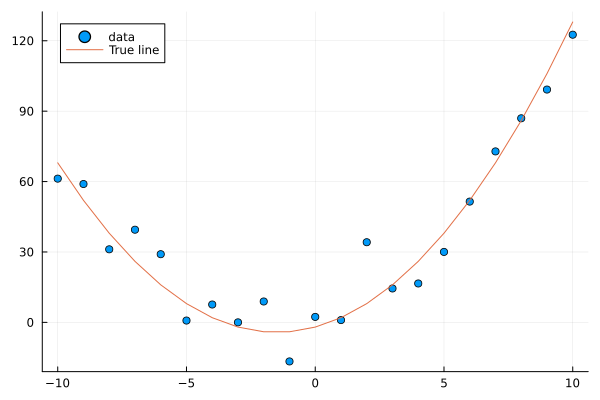

In [95]:
using Plots
using Polynomials
scatter(x,y_observed, label="data")
plot!(x,y_true, label="True line")

In [96]:
line_fit= fit(x,y_observed,2)

Polynomial(1.4619707250510945 + 2.7061174416743365*x + 0.9370705119829652*x^2)

In [68]:
fit_coeff= coeffs(line_fit)

3-element Vector{Float64}:
 -5.519429963960699
  2.851768487082851
  1.027357501813223

In [69]:
y_fitted=fit_coeff[1] .+ (fit_coeff[2].*(x)) .+ (fit_coeff[3] .*(x.^2))

21-element Vector{Float64}:
  68.6986353465331
  52.030611299164704
  37.41730225542277
  24.858708215307278
  14.354829178818225
   5.9056651459556235
  -0.4887838832805329
  -4.828517908890245
  -7.113536930873509
  -7.343840949230327
  -5.519429963960699
  -1.640303975064626
   4.293537017457897
  12.282093013606861
  22.325364013382273
  34.42335001678413
  48.57605102381243
  64.78346703446718
  83.04559804874839
 103.36244406665602
 125.73400508819012

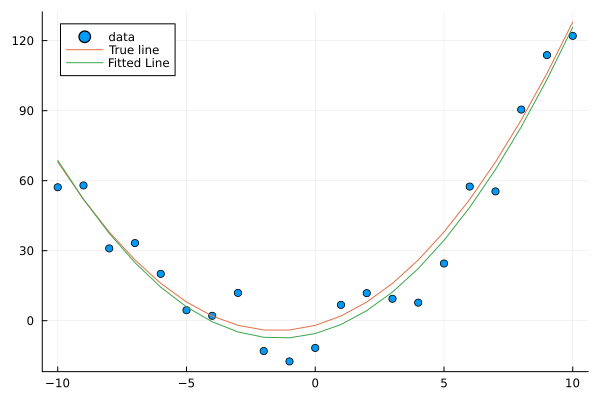

In [70]:
scatter(x,y_observed,label="data")
plot!(x,y_true, label="True line")
plot!(x,y_fitted, label="Fitted Line")

### 2.4

1. Repeat 2.2 and 2.3 with a noise with a standard deviation of 50

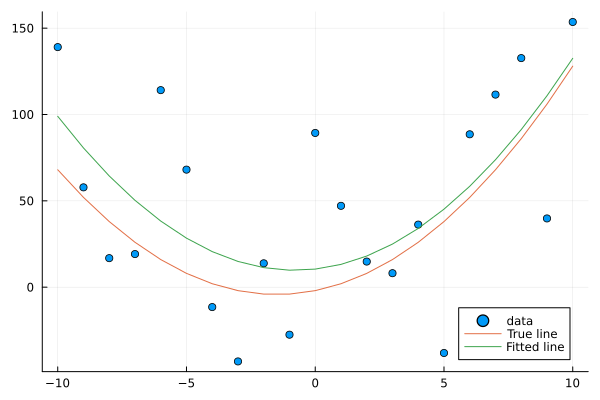

In [72]:
x2=-10:10
collect(x2)
y_true2 = x2.^2 .+ 3 .*x2 .-2
d2=50
noise2 = di.Normal(0,d2)
y_observed2 = y_true2 + rand(noise2,length(x2))
scatter(x2,y_observed2)
plot!(x2,y_true2)
line_fit2 = fit(x2,y_observed2,2)
fit_coeff2 = coeffs(line_fit2)
y_fitted2= fit_coeff2[1] .+(fit_coeff2[2].*(x2)) .+(fit_coeff2[3] .*(x2.^2))
scatter(x2,y_observed2, label="data")
plot!(x2,y_true2, label="True line")
plot!(x2,y_fitted2,label="Fitted line")

2. Compare the plot with the plot in 2.3. Is the fit closer to y_true or not, and why?

The fitted line is not close to the true line and this indicates that there is large standard deviation error.

### 2.5

#### Repeat 2.2 and 2.3 with a tenth order polynomial fit


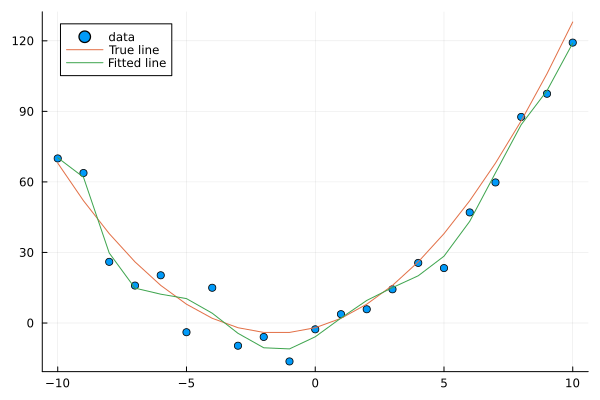

In [75]:
x3=-10:10
collect(x3)
y_true3 = x3.^2 .+ 3 .*x3 .-2
d3=10
noise3 = di.Normal(0,d3)
y_observed3 = y_true3 + rand(noise3,length(x3))
scatter(x3,y_observed3, label="data")
plot!(x3,y_true3,label= "True line")
poly_fit3 = fit(x3,y_observed3,10)
y_fitted3= poly_fit3.(x3)
plot!(x3, y_fitted3, label = "Fitted line")

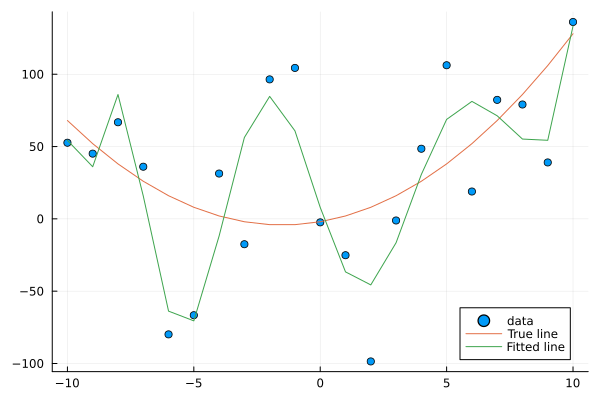

In [76]:
x3=-10:10
collect(x3)
y_true3 = x3.^2 .+ 3 .*x3 .-2
d3=50
noise3 = di.Normal(0,d3)
y_observed3 = y_true3 + rand(noise3,length(x3))
scatter(x3,y_observed3, label="data")
plot!(x3,y_true3,label= "True line")
poly_fit3 = fit(x3,y_observed3,10)
y_fitted3= poly_fit3.(x3)
plot!(x3, y_fitted3, label = "Fitted line")

### 2.6

1. Create a new independent parameter x_fit ranging from -11 to 11 with an increment of 0.1
2. Plot the same three plots as in 2.3 again but apply the tenth order polynomial to x_fit instead of x


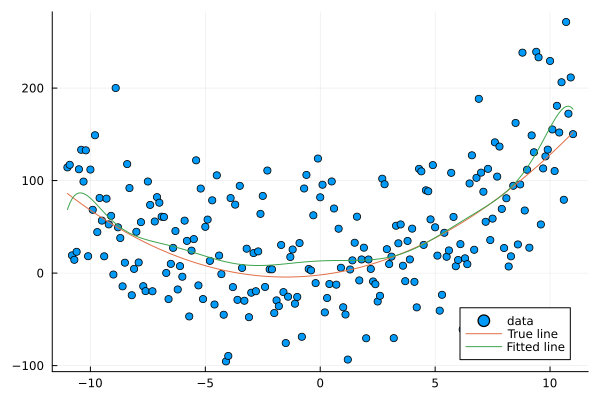

In [77]:
x_fit=-11:0.1:11
collect(x_fit)
y_true = x_fit.^2 .+ 3 .*x_fit .-2
d=10
noise = di.Normal(0,d)
y_observed = y_true + rand(noise3,length(x_fit));
scatter(x_fit,y_observed, label="data")
plot!(x_fit,y_true,label= "True line")
poly_fit = fit(x_fit,y_observed,10)
y_fitted= poly_fit.(x_fit)
plot!(x_fit, y_fitted, label = "Fitted line")

3. What do you observe in the plot? What is this phenomenon called?

The y value is scattered a lot and it inteferes with the true value and makes it complex. This polynomial phenomenon leads to overfitting